In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
data=pd.read_csv('onlinefraud.csv.zip')


### Exploratory Data Analysis

In [4]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
data.shape

(6362620, 11)

In [6]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


<AxesSubplot:>

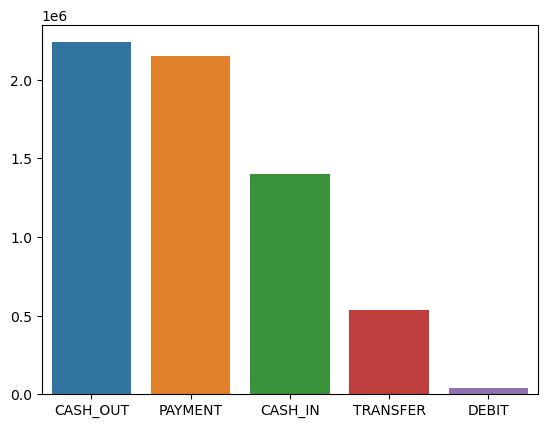

In [9]:
sns.barplot(x = data.type.value_counts().index, y = data.type.value_counts().values)


In [10]:
data[['oldbalanceOrg', 'newbalanceOrig']].corr()

,oldbalanceOrg,newbalanceOrig
oldbalanceOrg,1.000000,0.998803
newbalanceOrig,0.998803,1.000000


<AxesSubplot:xlabel='oldbalanceOrg', ylabel='newbalanceOrig'>

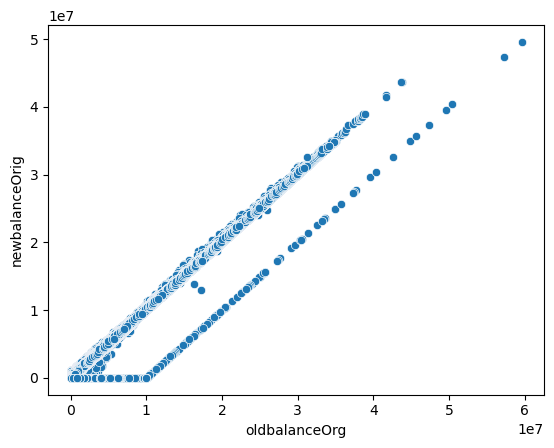

In [11]:
sns.scatterplot(x = data.oldbalanceOrg, y = data.newbalanceOrig)

In [12]:
data[data.isFraud == 1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


### Changing type to int by mapping to include the feature in our algorithm


In [13]:
data.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [14]:
data["type"] = data["type"].map({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})

In [15]:
data['type'].dtype

dtype('int64')

In [16]:
data.type.unique()

array([2, 4, 1, 5, 3], dtype=int64)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 534.0+ MB


In [18]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Detecting the outliers in the amount field

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='amount'>

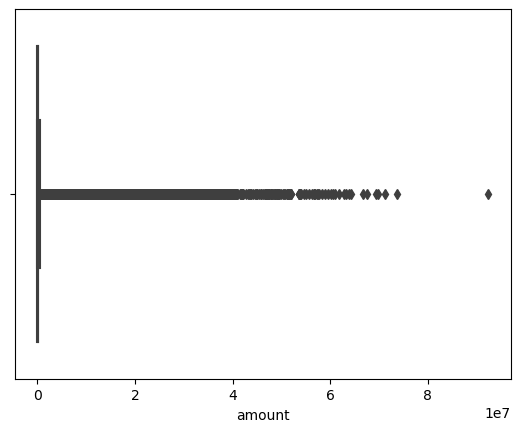

In [19]:
sns.boxplot(data.amount)

In [20]:
Q1 = np.percentile(data['amount'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data['amount'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

In [21]:
IQR

195331.935

In [22]:
upper = np.where(data['amount'] >= (Q3+1.5*IQR))
lower = np.where(data['amount'] <= (Q1-1.5*IQR))

In [23]:
len(upper[0])

338077

In [24]:
len(lower[0])

0

In [25]:
data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)

In [26]:
data.shape

(6024543, 11)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='oldbalanceOrg'>

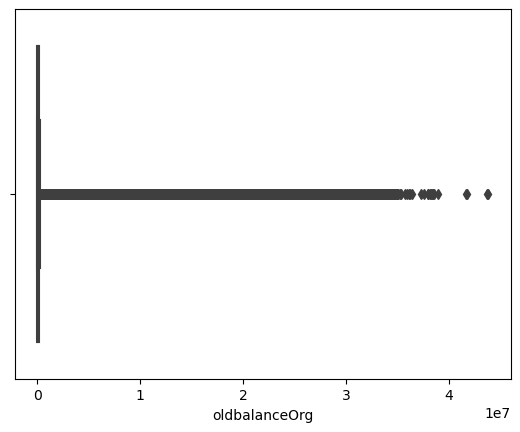

In [27]:
sns.boxplot(data.oldbalanceOrg)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='newbalanceDest'>

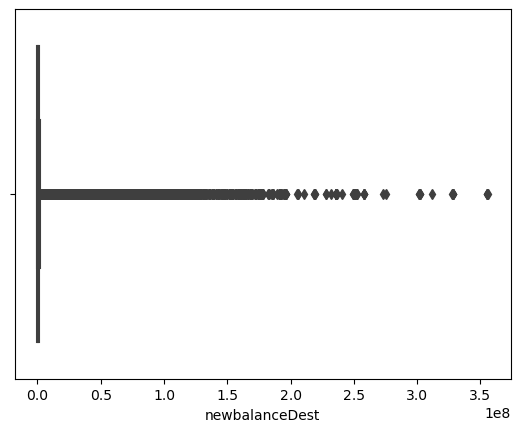

In [28]:
sns.boxplot(data['newbalanceDest'])

### Class Imbalance

In [29]:
data.isFraud.value_counts()

0    6020184
1       4359
Name: isFraud, dtype: int64

In [30]:

data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [31]:


data.drop(['nameOrig'],axis=1,inplace=True)

In [32]:
data.drop(['nameDest'],axis=1,inplace=True)

In [33]:
columns=data.columns.tolist()
columns=[c for c in columns if c not in ['isFraud','step']]
target='isFraud'
X=data[columns]
Y=data[target]
print(X.shape)
print(Y.shape)

(6024543, 7)
(6024543,)


In [34]:
X

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,2,9839.64,170136.00,160296.36,0.00,0.00,0
1,2,1864.28,21249.00,19384.72,0.00,0.00,0
2,4,181.00,181.00,0.00,0.00,0.00,0
3,1,181.00,181.00,0.00,21182.00,0.00,0
4,2,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...
6362609,1,258355.42,258355.42,0.00,25176.67,283532.09,0
6362610,4,63416.99,63416.99,0.00,0.00,0.00,0
6362611,1,63416.99,63416.99,0.00,276433.18,339850.17,0
6362614,4,339682.13,339682.13,0.00,0.00,0.00,0


### Train Test Split

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [36]:
X_train.shape,X_test.shape

((4819634, 7), (1204909, 7))

In [37]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)
print(scaler.mean_)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

[1.97677168e+00 1.11567868e+05 8.62908723e+05 8.86918952e+05
 9.87469356e+05 1.03818922e+06 2.07484635e-07]


### SMOTE Method

In [38]:
!pip install imbalanced-learn

In [39]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [40]:
print('Original DataSet Shape %s'%Counter(y_train))
sm=SMOTE(random_state=42)
X_res,y_res=sm.fit_resample(X_train,y_train)
print('Resampled DataSet Shape %s'%Counter(y_res))

Original DataSet Shape Counter({0: 4816192, 1: 3442})
Resampled DataSet Shape Counter({0: 4816192, 1: 4816192})


### Building Algorithms and finding Precision Metrics

In [41]:
!pip install xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score

In [42]:
models = {
    
    
    "XGB": XGBClassifier()
    
}

In [43]:
for name, model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(X_res, y_res)
    y_pred = model.predict(X_test)
    print(f'Training Accuracy: {accuracy_score(y_res, model.predict(X_res))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print("Recall Score : ",recall_score(y_test, y_pred, pos_label='positive', average='micro'))    
    print("Precision Score : ",precision_score(y_test, y_pred,  pos_label='positive',average='micro'))     
    print(f"Testing F-1:", f1_score(y_test, y_pred, pos_label='positive', average='micro' )        )
    print(f"Testing F-Beta:", fbeta_score(y_test, y_pred, beta=0.5, pos_label='positive', average='micro'))
    print('-'*30)

Training Model XGB 
--------------
Training Accuracy: 0.9986939889439623
Testing Accuracy: 0.9978570995817941
Testing Confusion Matrix: 
[[1201422    2570]
 [     12     905]]


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Recall Score :  0.9978570995817941


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Precision Score :  0.9978570995817941


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Testing F-1: 0.9978570995817941


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Testing F-Beta: 0.9978570995817941
------------------------------


In [44]:
model.predict([[2,9839.64,170136.0,160296.36,0.00,0.00,0]])
    

array([0])

In [45]:
model.predict([[4,181.00,181.00,0.00,0.00,0.00,0]])

array([0])

In [46]:
if  model.predict([[2,9839.64,170136.0,160296.36,0,0,0]])[0] == 0:
    print('not Fraud')
else: print('is Fraud')

not Fraud


In [47]:
if  model.predict([[1,181.00,181.00,0.00,21182.00,0.00,0]])[0] == 0:
    print('not Fraud')
else: print('is Fraud')

not Fraud


In [48]:
if model.predict([[1,258355.42,258355.42,0.00,25176.67,283532.09,0]])==0 :
    print('Not Fraud')
else: print ('is Fraud')

Not Fraud


In [49]:
print('Testing Result',Counter(y_test))
print('Predicted Result',Counter(y_pred))



Testing Result Counter({0: 1203992, 1: 917})
Predicted Result Counter({0: 1201434, 1: 3475})
